# Cars Clustering

### In this lesson we will classify car models

<a href='https://www.kaggle.com/datasets/imgowthamg/car-price' target=_blank>You can find the data file here</a>

<img src=https://static.pakwheels.com/2021/09/shutterstock_1110113033-1.jpg width='400'>

In [1]:
import pandas as pd
import pickle

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",181)
pd.set_option("display.max_rows",None)

In [2]:
df=pd.read_csv('CarPrice.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df = df.drop(['car_ID','symboling','CarName'], axis=1)

In [6]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [8]:
df['fueltype'] = (df['fueltype'] == 'diesel').astype(int)

In [9]:
df['fueltype'].value_counts()

fueltype
0    185
1     20
Name: count, dtype: int64

In [10]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [12]:
df['aspiration'] = (df['aspiration'] == 'turbo').astype(int)

In [13]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [14]:
df['doornumber'] = df['doornumber'].map({'four': 4, 'two': 2})

In [15]:
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [16]:
df['drivewheel'] = df['drivewheel'].map({'fwd': 0, 'rwd': 1, '4wd': 2})

In [17]:
df['drivewheel'].value_counts()

drivewheel
0    120
1     76
2      9
Name: count, dtype: int64

In [18]:
df['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [19]:
df['enginelocation'] = df['enginelocation'].map({'front': 0, 'rear': 1})

In [20]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [21]:
df['cylindernumber'] = df['cylindernumber'].map({'four': 4, 'six': 6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}).astype(int)

In [22]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,2,hatchback,1,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,0,4,sedan,0,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,0,4,sedan,2,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
df=pd.get_dummies(df,drop_first=True)

In [24]:
df

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.680,9.00,111,5000,21,27,13495.000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,0,0,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.680,9.00,111,5000,21,27,16500.000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,0,0,2,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.470,9.00,154,5000,19,26,16500.000,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,0,0,4,0,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.400,10.00,102,5500,24,30,13950.000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,0,0,4,2,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.400,8.00,115,5500,18,22,17450.000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
5,0,0,2,0,0,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.400,8.50,110,5500,19,25,15250.000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
6,0,0,4,0,0,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.400,8.50,110,5500,19,25,17710.000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
7,0,0,4,0,0,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.400,8.50,110,5500,19,25,18920.000,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False
8,0,1,4,0,0,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.400,8.30,140,5500,17,20,23875.000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
9,0,1,2,2,0,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.400,7.00,160,5500,16,22,17859.167,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
wcss=[]
ss=[]
for i in range(2,14):
    model=KMeans(i)
    model=model.fit(df)
    tahmin=model.predict(df)
    ss1=silhouette_score(df,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.722221352810153
0.6530944396356803
0.5657308705255438
0.5474925884883255
0.5465195734784882
0.49683887903266866
0.4939851557493253
0.41463901828160143
0.42213058428756267
0.4543012353449739
0.4081480374582429
0.4251971927095092


In [27]:
import matplotlib.pyplot as plt

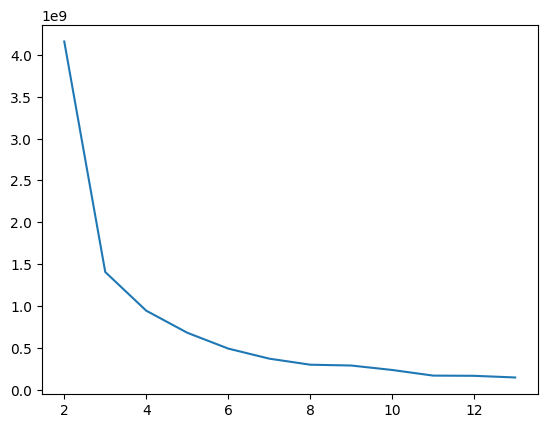

In [28]:
plt.plot(range(2,14),wcss)

In [29]:
from yellowbrick.cluster import KElbowVisualizer

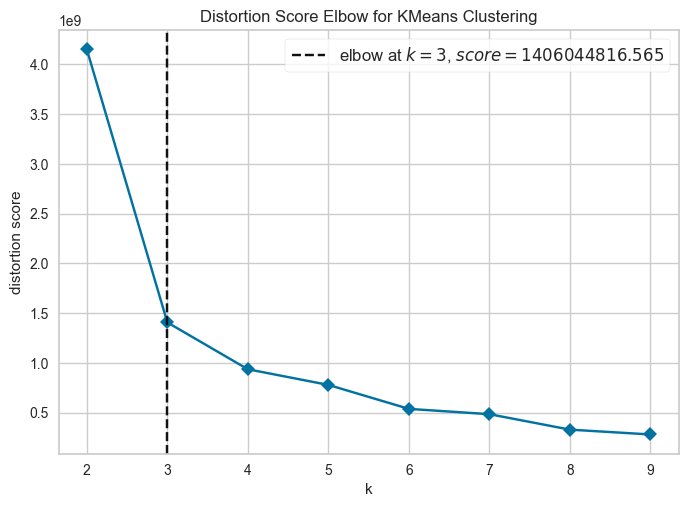

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

visualizer.fit(df)  
visualizer.show()

In [31]:
silhouette_score(df,tahmin)

0.4251971927095092

In [32]:
model=KMeans(3)

In [33]:
model.fit(df)

KMeans(n_clusters=3)

In [34]:
model=model.fit(df)

In [35]:
tahmin=model.predict(df)

In [36]:
tahmin

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [37]:
df['cluster']=tahmin

In [38]:
with open('model.pkl', 'wb') as f:
   pickle.dump(model, f)

In [39]:
df.sample(30)

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cluster
72,0,0,2,1,0,96.6,180.3,70.5,50.8,3685,8,234,3.46,3.10,8.30,155,4750,16,18,35056.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,1
120,0,0,4,0,0,93.7,157.3,63.8,50.6,1967,4,90,2.97,3.23,9.40,68,5500,31,38,6229.0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0
25,0,0,4,0,0,93.7,157.3,63.8,50.6,1989,4,90,2.97,3.23,9.40,68,5500,31,38,6692.0,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0
94,0,0,2,0,0,94.5,165.3,63.8,54.5,1951,4,97,3.15,3.29,9.40,69,5200,31,37,7299.0,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0
92,0,0,4,0,0,94.5,165.3,63.8,54.5,1938,4,97,3.15,3.29,9.40,69,5200,31,37,6849.0,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0
178,0,0,2,1,0,102.9,183.5,67.7,52.0,2976,6,171,3.27,3.35,9.30,161,5200,20,24,16558.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,2
83,0,1,2,0,0,95.9,173.2,66.3,50.2,2921,4,156,3.59,3.86,7.00,145,5000,19,24,14869.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,2
37,0,0,2,0,0,96.5,167.5,65.2,53.3,2236,4,110,3.15,3.58,9.00,86,5800,27,33,7895.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0
204,0,1,4,1,0,109.1,188.8,68.9,55.5,3062,4,141,3.78,3.15,9.50,114,5400,19,25,22625.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,2
21,0,0,2,0,0,93.7,157.3,63.8,50.8,1876,4,90,2.97,3.23,9.41,68,5500,37,41,5572.0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0


In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
data=linkage(df, method='ward', metric='euclidean')

In [42]:
import matplotlib.pyplot as plt

In [43]:
plt.figure(figsize=(25,6))

<Figure size 2500x600 with 0 Axes>

<Figure size 2500x600 with 0 Axes>

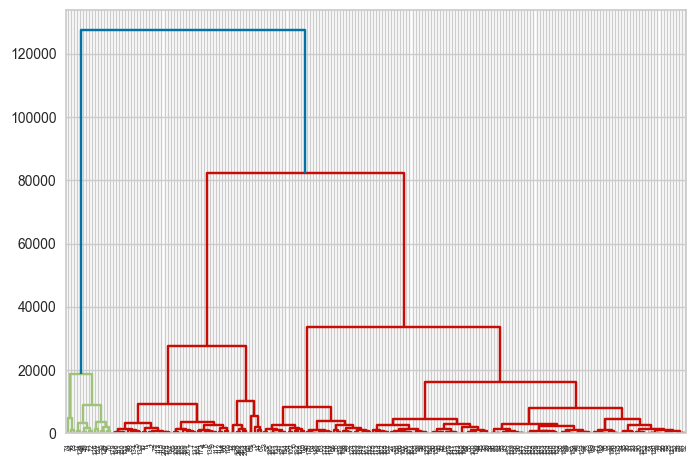

In [44]:
dendrogram(data);

In [45]:
import seaborn as sns

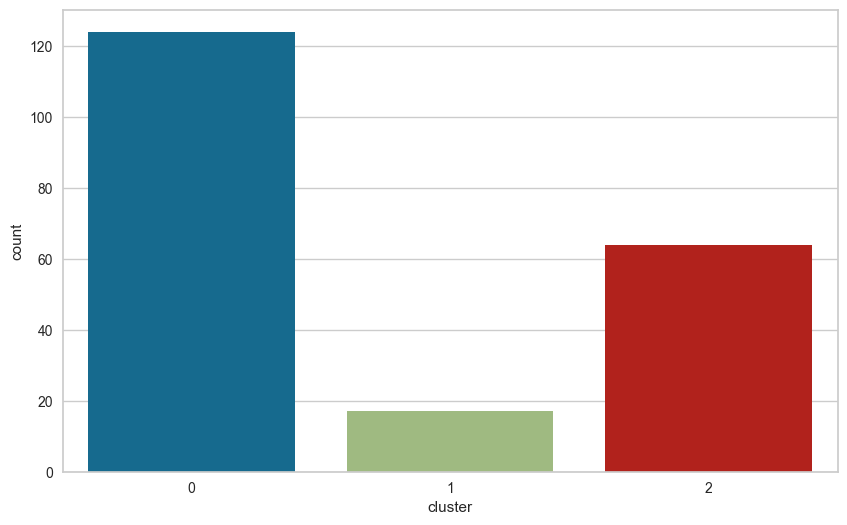

In [46]:
plt.figure(figsize=(10, 6))  
sns.countplot(x=df['cluster'])
plt.show()

Text(0, 0.5, 'price')

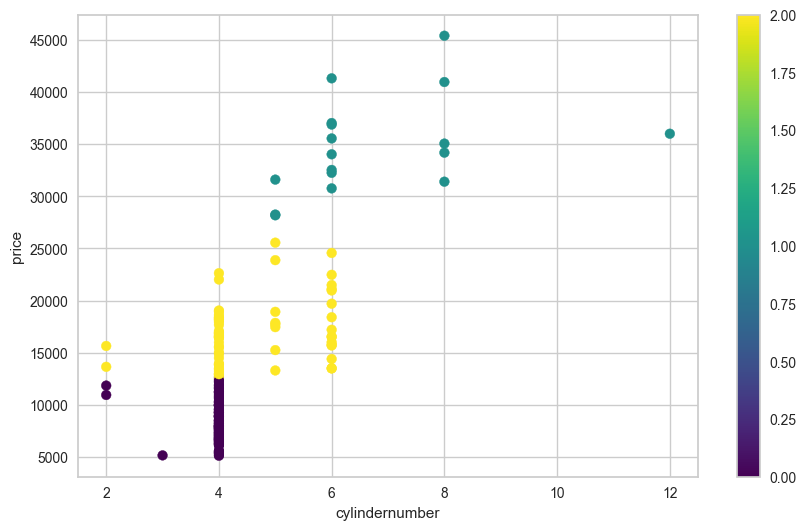

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(df.cylindernumber,df.price, c=tahmin, cmap='viridis')
plt.colorbar()
plt.xlabel('cylindernumber')
plt.ylabel('price')

Text(0, 0.5, 'price')

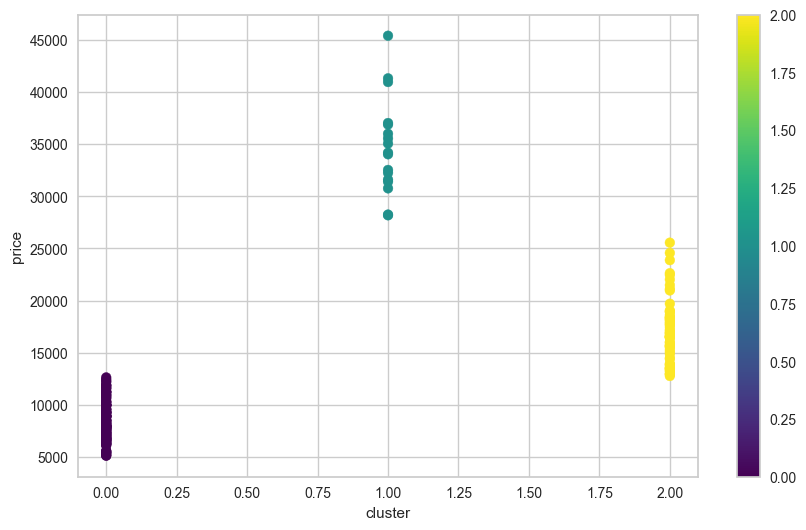

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(df.cluster,df.price, c=tahmin, cmap='viridis')
plt.colorbar()
plt.xlabel('cluster')
plt.ylabel('price')

## We made our clustering in 3 groups: vehicles up to 12,500 dollars become class 0, vehicles between 12,500-26,000 dollars become class 1, and vehicles over $26,000 become class 2